# K-Nearest Neighbors: From Scratch & scikit-learn on the Wine Dataset
In this notebook, we:

- Load and explore the Wine dataset
- Visualize two key features
- Implement KNN from scratch (Euclidean distance, majority vote)
- Evaluate classification performance (accuracy, confusion matrix)
- Use scikit-learn's `KNeighborsClassifier` with various options
- Perform hyperparameter tuning via cross-validation
- Visualize decision boundary on two features

**Formulas** and detailed explanations are provided at each step.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
sns.set_theme()

## Data Loading & Exploration
Load the Wine dataset and examine its structure and class distribution.

In [30]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Feature matrix shape: (178, 13)
Target vector shape: (178,)
Number of classes: 3


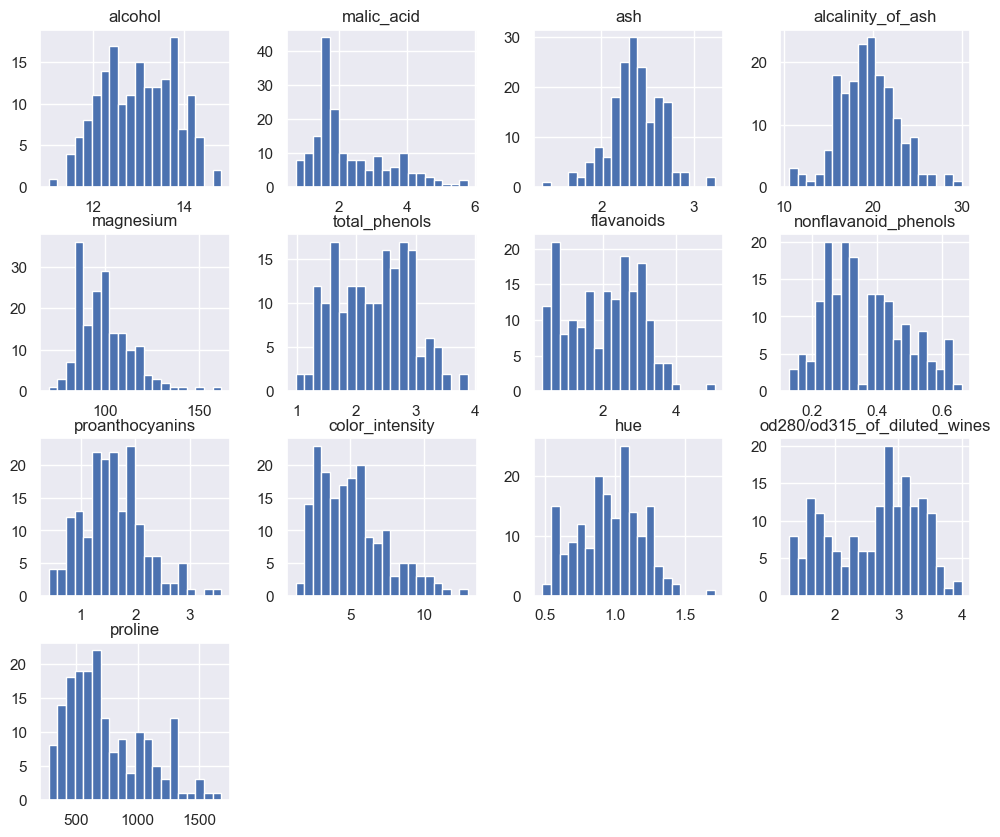

In [20]:
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")
X.describe()
X.hist(figsize=(12, 10), bins=20)
plt.show()

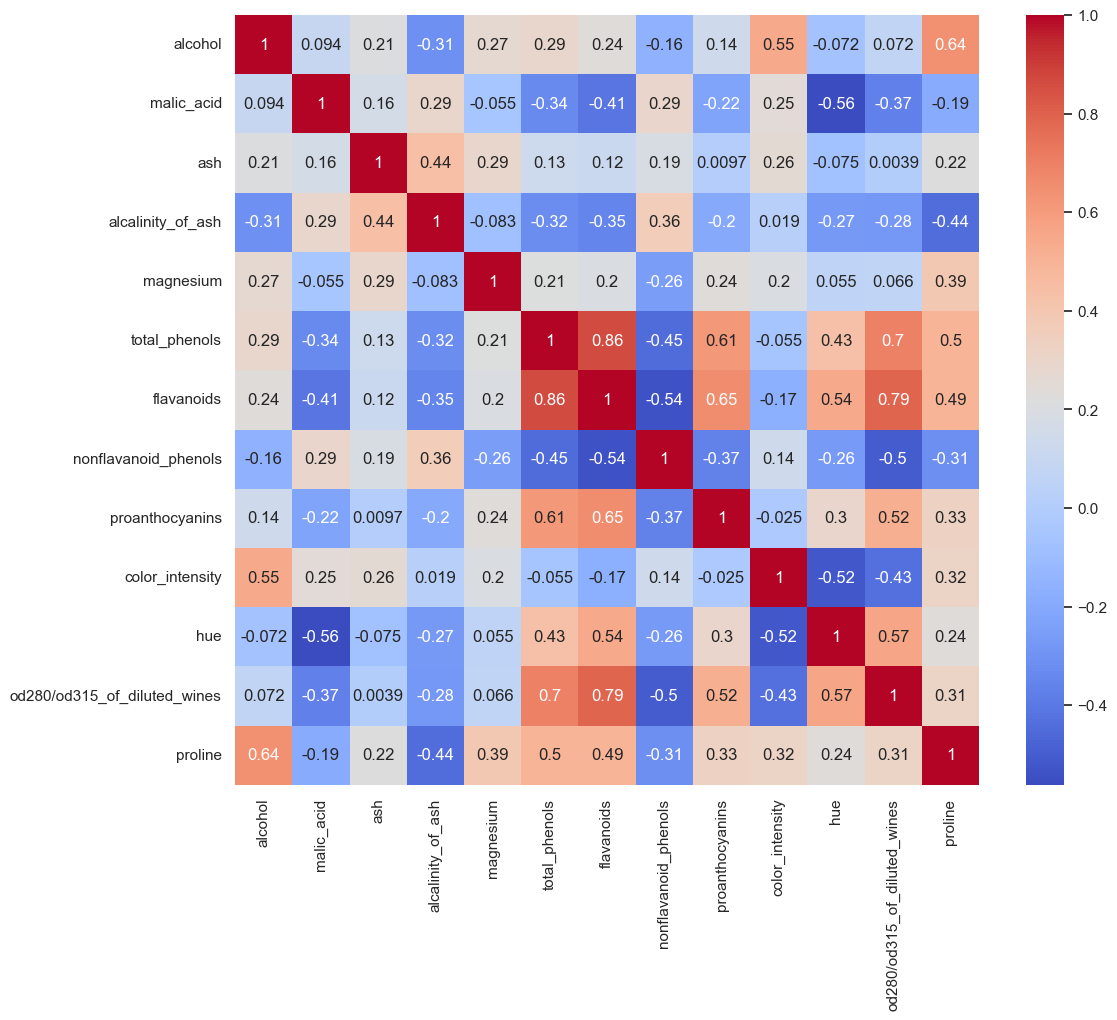

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

## Visualizing Two Features: Alcohol vs Malic Acid
Scatter plot to inspect class separation.

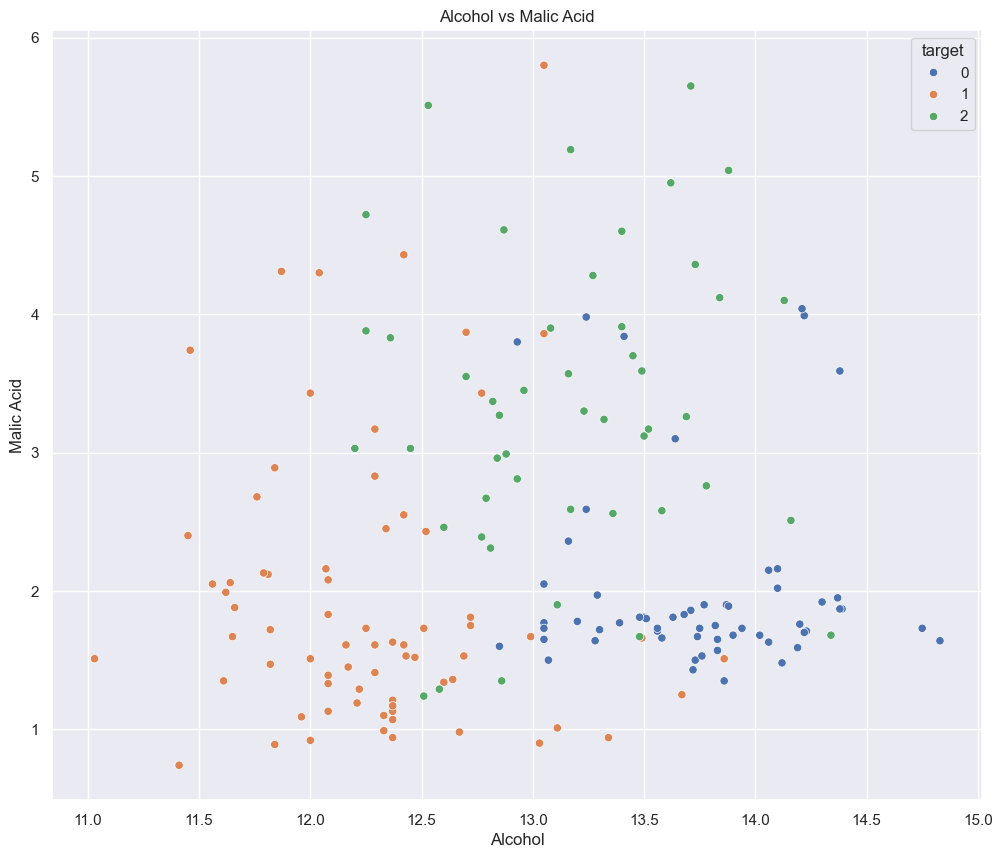

In [22]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X['alcohol'], y=X['malic_acid'], hue=y, palette='deep')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Alcohol vs Malic Acid')
plt.show()

## Preprocessing
1. **Standardize** features:
$$X_{\mathrm{std}} = \frac{X - \mu}{\sigma}$$
2. **Train/Test split** (80% train, 20% test) with stratification.

In [23]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 142, Test samples: 36


## KNN
Train `KNeighborsClassifier` with default parameters.

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Evaluation of Scratch KNN (k=5)
Compute accuracy, confusion matrix, and classification report.

In [25]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.97



**Overall Accuracy (0.97)**  
  The model correctly classified 35 out of 36 test samples, yielding a high overall accuracy of 97%.

Confusion Matrix:


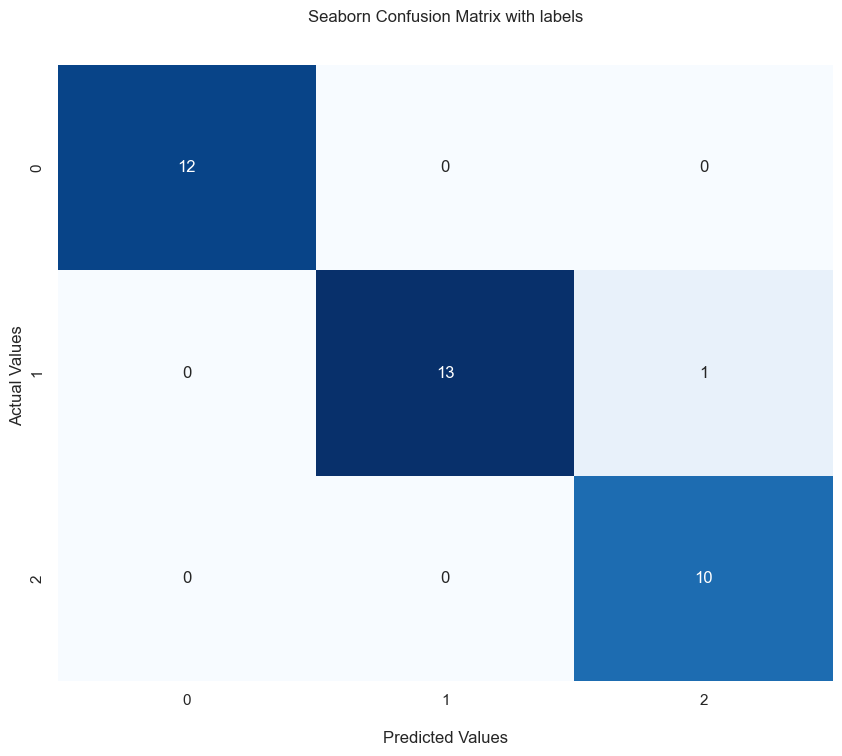

[[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]


In [ ]:
print("Confusion Matrix:")
cf_matrix = confusion_matrix(y_test, y_pred)

# View the confusion matrix using the seaborn package
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False)

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0', '1', '2'])
ax.yaxis.set_ticklabels(['0', '1', '2'])
plt.show()
print(cf_matrix)

**Confusion Matrix**  
- **Class 0**: All 12 samples were correctly classified (no false positives or false negatives).  
- **Class 1**: Of 14 true class-1 samples, 13 were correctly identified and 1 was misclassified (as class 2).  
- **Class 2**: All 10 samples were correctly classified (no confusion with other classes).

In [27]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



**Classification Metrics**  
- **Class 1** has perfect precision (no false positives) but a slightly lower recall (one false negative), causing its F1-score to dip to 0.96.  
- **Class 2** has perfect recall (no misses) but one false positive, yielding precision = 0.91 and F1 = 0.95.

**Overall Results:**  
- The classifier is extremely accurate, with only one misclassification.  
- Minor room for improvement exists on class 1’s recall and class 2’s precision.  
- If misclassifying class 1 as class 2 (or vice versa) carries a cost, consider gathering more class-1 samples or adjusting decision thresholds.  
- Overall, these results demonstrate a robust KNN model on the chosen feature subset. 

## Decision Boundary (Alcohol vs Malic Acid)
Visualize decision regions using the two selected features.

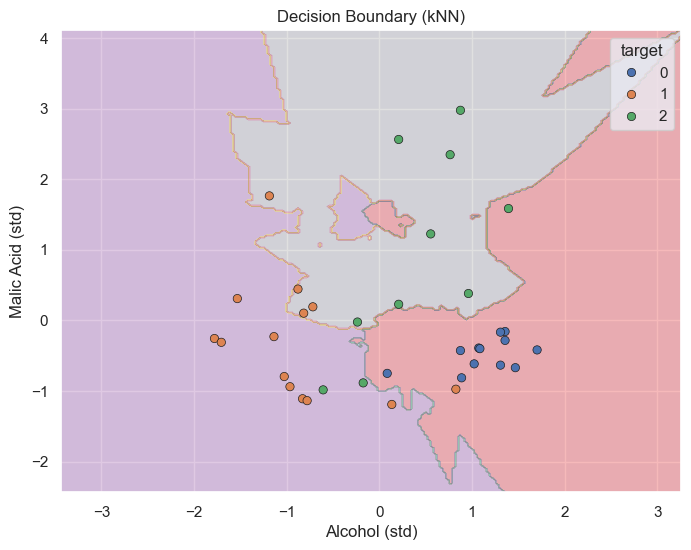

In [36]:
X2_train = X_train[:, [0,1]]
X2_test = X_test[:, [0,1]]
knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y_train)

xx, yy = np.meshgrid(
    np.linspace(X2_train[:,0].min()-1, X2_train[:,0].max()+1, 200),
    np.linspace(X2_train[:,1].min()-1, X2_train[:,1].max()+1, 200)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z = knn2.predict(grid_points).reshape(xx.shape)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
sns.scatterplot(x=X2_test[:,0], y=X2_test[:,1], hue=y_test, palette='deep', edgecolor='k')
plt.xlabel('Alcohol (std)')
plt.ylabel('Malic Acid (std)')
plt.title('Decision Boundary (kNN)')
plt.show()

- The decision boundary plot illustrates the non-linear separation captured by KNN.